In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

JHU_CSV_URL = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
CAN_TIMELINE_URL = "https://raw.githubusercontent.com/ccodwg/CovidTimelineCanada/main/data/can/cases_can.csv"
UN_POPULATION_CSV_URL = "https://raw.githubusercontent.com/owid/covid-19-data/152b2236a32f889df3116c7121d9bb14ce2ff2a8/scripts/input/un/population_2020.csv"

In [21]:
country = "Canada"
raw_data = pd.read_csv(JHU_CSV_URL)
raw_data = raw_data[raw_data.Country == country]
population_df = pd.read_csv(
        UN_POPULATION_CSV_URL,
        keep_default_na=False,
        usecols=["entity", "year", "population"],
    )
population_df = population_df.loc[population_df["entity"] == country]
population_df = population_df.loc[population_df["year"] == 2020]
population = float(population_df["population"])

data = pd.Series(np.log((population - raw_data["Confirmed"])/population  * 1000))

Text(0, 0.5, 'S(t) (%)')

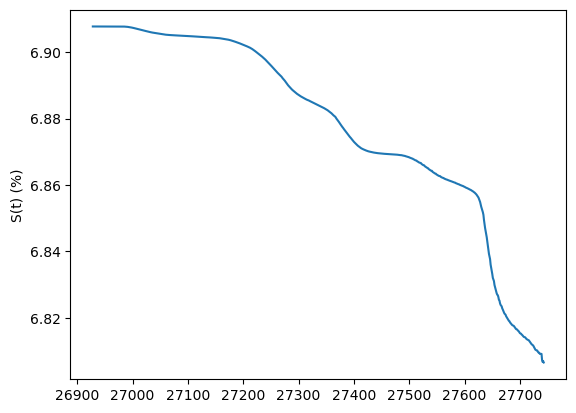

In [22]:
plt.plot(data)
plt.ylabel("S(t) (%)")

Rolling Window of 7 days : 2.3161937724333274e-07
Rolling Window of 6 days : 1.7606092688724594e-07
Rolling Window of 5 days : 1.2808287625043214e-07
Rolling Window of 4 days : 8.698757385853561e-08


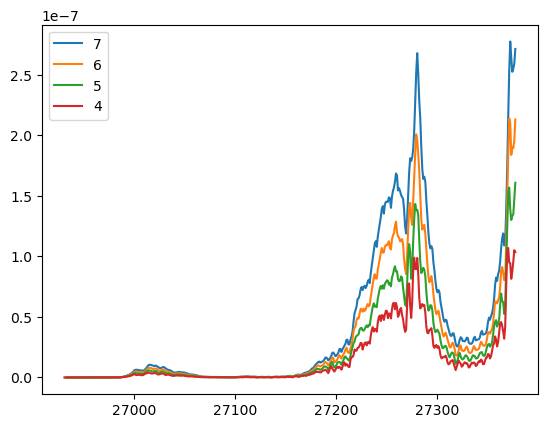

In [42]:
for i in range(4):
    plt.plot(data.rolling(7-i).var().iloc[:450], label=str(7-i))
    print("Rolling Window of {} days : {}".format(7-i, data.rolling(7-i).var().mean()))
plt.legend()

In [75]:
simdata = data + np.random.normal(loc=0, scale=1e-2)

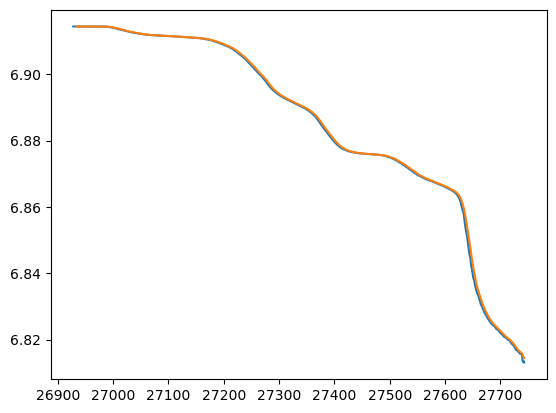

In [79]:
plt.plot(simdata)
plt.plot(simdata.rolling(7).mean())

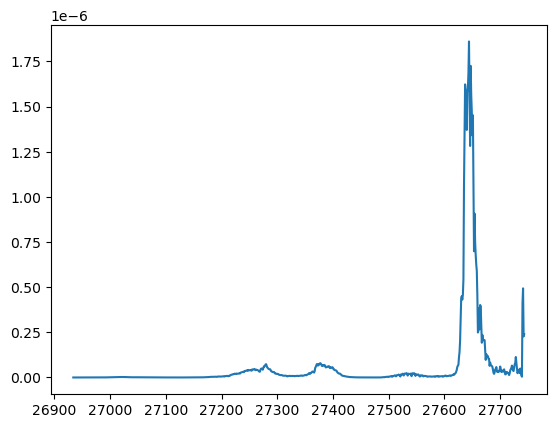

In [91]:
plt.plot((simdata - simdata.rolling(7).mean())**2 / 7)